In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Concrete_Data_Yeh.csv')
target = df.csMPa.values

In [3]:
del df['csMPa']

In [4]:
X = df.values
X.shape

(1030, 8)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
from sklearn.decomposition import PCA # within the scikit-learn module which focuses on
                                      # Machine Learning in Python, we import PCA decomposition algorithm
pca8 = PCA(n_components=8)            # applies PCA with the argument that we want a two-component fit
pca8.fit(X_scaled)                           # fits the PCA model with dataset X defined above
print(pca8)                          # this is only the PCA object!
X_pca8 = pca8.transform(X_scaled)

# The fit learns some quantities from the data, namely the "components" and "explained variance"
# In this example, there are two sets of components to be described below

print('components: ' + str(pca8.components_))                 # each component defined by x-y pair
print('explained variance: ' + str(pca8.explained_variance_)) # how much variance each component explains 
                                                              # taking into consideration the entire dataset
print('cummulative explained variance: ' + str(round(sum(pca8.explained_variance_),3)))
print('ratio: ', sum(pca8.explained_variance_ratio_ * 100))

PCA(n_components=8)
components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]
explained variance: [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]
cummulative explained variance: 8.008
ratio:  99.

In [7]:
np.cumsum(pca8.explained_variance_ratio_ * 100)

array([ 28.50124202,  46.20217702,  62.95316494,  75.6301508 ,
        87.52400072,  97.40144413,  99.62446526, 100.        ])

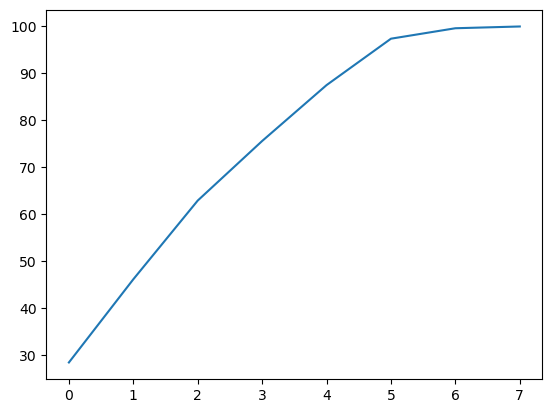

In [11]:
plt.plot(np.cumsum(pca8.explained_variance_ratio_ * 100))

<AxesSubplot:>

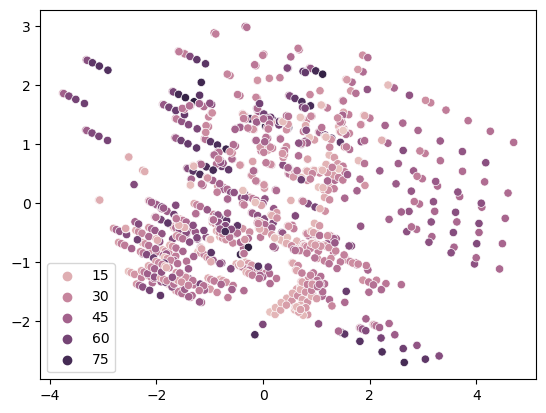

In [10]:
pca2 = PCA(n_components=2)            # applies PCA with the argument that we want a two-component fit
pca2.fit(X_scaled)                           # fits the PCA model with dataset X defined above
X_pca2 = pca2.transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0],y=X_pca2[:,1],hue=target)

In [14]:
print('components: ' + str(pca2.components_))

components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]]
